# LENDING CLUB CASE STUDY
    
    The dataset provided contains historical information about individuals who applied for loans and whether they experienced a 'default' event. The objective is to discern recurring trends that can help predict the likelihood of loan default. This insight can guide decision-making processes, including loan approval, loan amount adjustments, and the application of higher interest rates for riskier candidates.

Our analysis will adhere to the following steps:

1. **Comprehending the Loan Dataset:**
   - Gain a comprehensive understanding of the dataset's contents, variables, and attributes.

2. **Data Cleansing:**
   - Eliminate inconsistencies and errors from the dataset to ensure accuracy in subsequent analyses.

3. **Data Enhancement:**
   - Enhance the dataset by addressing missing or incomplete information, improving data quality.

4. **Univariate Analysis:**
   - Conduct a univariate examination of individual variables to uncover preliminary patterns and characteristics.

5. **Segmented Univariate Analysis:**
   - Perform a more focused univariate analysis by segmenting data based on specific criteria, revealing nuanced insights.

6. **Bivariate Analysis:**
   - Investigate relationships between pairs of variables to uncover potential associations and dependencies.

7. **Variable Correlation Assessment:**
   - Explore the correlation between different variables to identify potential interdependencies.

8. **Drawing Conclusions:**
   - Summarize the key findings and insights gained from the data analysis.

By diligently following these steps, we aim to extract meaningful information from the dataset that can be used to make informed decisions related to loan management and risk assessment.


In [11]:
#importing required libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings('ignore')



### UNDERSTANDING THE LOAN DATA SET

In [12]:
#Loading and understnding the data set
loan_df = pd.read_csv('loan.csv')
pd.set_option('display.max_columns', None)
print(loan_df.info())
loan_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Data Cleaning

Upon initial inspection, it is evident that certain columns contain missing values (NA). Our primary action involves the removal of columns with a substantial amount of missing data, thereby narrowing our focus to essential parameters.

In [13]:
#Checking for total count of missing values in in 
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [14]:
print((loan_df.isnull().sum()/loan_df.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [15]:
# Removing column which has more than 75% or more 
loan_df = loan_df.loc[:,loan_df.isnull().sum()/loan_df.shape[0]*100<75]
print(loan_df.shape)

(39717, 55)


In [16]:
print(loan_df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [17]:
#Checking for any duplicate and removing the duplicates 
df_duplicate = loan_df[loan_df.duplicated()]
df_duplicate.shape

(0, 55)

    It is clear that there is no duplicate row

In [18]:
# Checking for unique values in each columns 
print(loan_df.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

### Data Column Selection

In order to streamline our analysis, we will carefully choose the relevant columns for examination:

1. **Eliminating Single Unique Value Columns:**
   - Some columns exhibit just one unique value across all rows, providing no analytical value. These columns will be removed: ['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_lines', 'collections_12_mths_ex_med'].

2. **Trimming Columns with High Unique Values:**
   - Columns with an excessive number of unique values, which are irrelevant for analysis, will be excluded: ['id', 'member_id', 'url', 'desc', 'title'].

3. **Filtering Out Columns with Null Values and Irrelevance:**
   - Columns with a significant number of null values or containing data irrelevant for this analysis will be removed: ['emp_title', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'].

4. **Focusing on Relevant Variables for Loan Default Prediction:**
   - Our primary objective is to pinpoint the driving variables that contribute to loan default prediction. Consequently, we will exclude columns generated post-loan and those pertaining to customer behavior: ['zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'funded_amnt_inv', 'inq_last_6mths'].

This meticulous column selection process ensures that we focus exclusively on the most pertinent variables for our analysis—those that have the potential to reveal insights about loan default likelihood.

In [19]:
#dropping all unwanted columns 
loan_df = loan_df.drop(columns = ['funded_amnt_inv','inq_last_6mths','pymnt_plan','collections_12_mths_ex_med','initial_list_status','out_prncp','out_prncp_inv','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','id','member_id','url','desc','title','emp_title','mths_since_last_delinq','zip_code','addr_state','delinq_2yrs','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'])

In [20]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  pub_rec_bankruptcie

### Data Correction

Upon closer examination, it is apparent that the dataset contains multiple columns with the 'object' data type that require correction.

In [21]:
#connverting term column into integer
loan_df['term'] = loan_df['term'].apply(lambda x: int(x[:-7]))

In [22]:
#remove % from int_rate
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x[:-1]))

In [23]:
#Coverting loan_status into boolean for better ananlysis
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 0 if x =='Fully Paid' else 1).astype(float)


In [24]:
#converting emp_length to integer value
loan_df['emp_length'] = loan_df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

In [25]:
loan_df['loan_status'].value_counts()

0.0    32950
1.0     6767
Name: loan_status, dtype: int64

In [26]:
loan_df.grade=loan_df.grade.astype('category')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             39717 non-null  int64   
 1   funded_amnt           39717 non-null  int64   
 2   term                  39717 non-null  int64   
 3   int_rate              39717 non-null  float64 
 4   installment           39717 non-null  float64 
 5   grade                 39717 non-null  category
 6   sub_grade             39717 non-null  object  
 7   emp_length            38642 non-null  float64 
 8   home_ownership        39717 non-null  object  
 9   annual_inc            39717 non-null  float64 
 10  verification_status   39717 non-null  object  
 11  issue_d               39717 non-null  object  
 12  loan_status           39717 non-null  float64 
 13  purpose               39717 non-null  object  
 14  dti                   39717 non-null  float64 
 15  pu

In [27]:
# Checking for missing values across the dataframe
loan_df.isnull().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
dtype: int64

In [28]:
# pub_rec_bankruptcies column we can consider pushing 0 against the corresponding null values 
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)

Handling Missing Values in 'emp_length'

Given the presence of 1075 missing values in the 'emp_length' column, a strategic decision is to proceed with the existing missing values rather than resorting to removal or substitution with unknown values.

### UNIVARIANTE ANALYSIS

{'whiskers': [<matplotlib.lines.Line2D at 0x1bee40cef40>,
 'caps': [<matplotlib.lines.Line2D at 0x1bee40e84c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bee40cec70>],
 'medians': [<matplotlib.lines.Line2D at 0x1bee40e8a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bee40e8ca0>],
 'means': []}

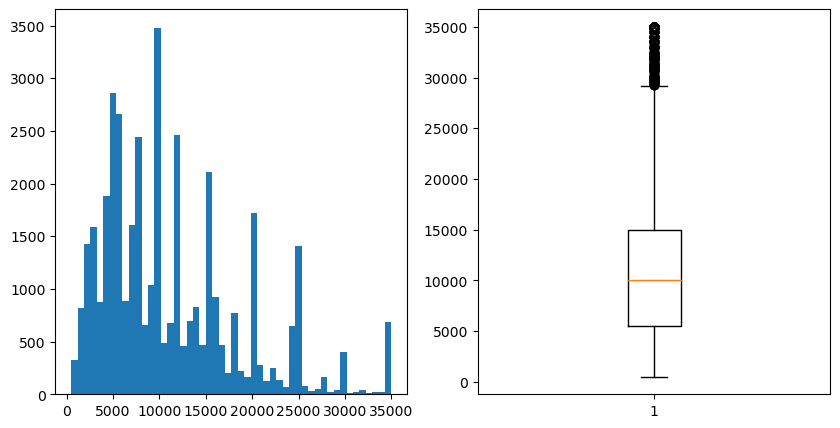

In [29]:
column ='loan_amnt'
fig, (ax1, ax2) = plot.subplots(1, 2, figsize=(10, 5))
ax1.hist(loan_df[column], bins=50)
ax2.boxplot(loan_df[column])


Loan Amount Distribution and Trends

The analysis of loan amounts reveals a notable trend: a significant proportion of loans fall within the range of 5000 to 15000. The peak loan amount is at 10000, and an evident pattern emerges with a pronounced spike in loan amounts that are multiples of 5000. This observation suggests a borrower preference for seeking loans in increments of 5000.

It's important to acknowledge the presence of outliers, particularly loan amounts exceeding 30000, which deviate from the prevalent trend. These outliers represent cases where borrowers have opted for significantly higher loan amounts.

{'whiskers': [<matplotlib.lines.Line2D at 0x1bee4a0a820>,
 'caps': [<matplotlib.lines.Line2D at 0x1bee4a0ad60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bee4a0a550>],
 'medians': [<matplotlib.lines.Line2D at 0x1bee4a1a2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bee4a1a580>],
 'means': []}

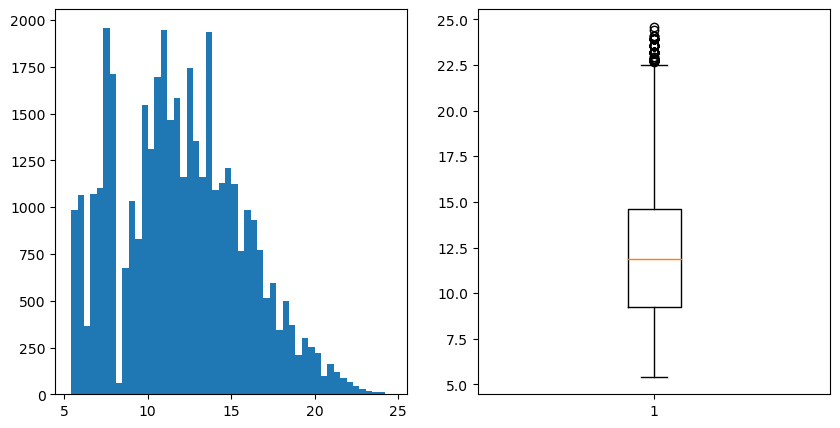

In [30]:
column ='int_rate'
fig, (ax1, ax2) = plot.subplots(1, 2, figsize=(10, 5))
ax1.hist(loan_df[column], bins=50)
ax2.boxplot(loan_df[column])

Interest Rate Analysis

The examination of interest rates reveals several insightful patterns:

1. **Average Interest Rate and Common Rates:**
   - The average interest rate across loans is approximately 12%. This serves as a benchmark for assessing individual interest rates.

2. **Prominent Interest Rate Peaks:**
   - Notably, there are distinct spikes in interest rates at around 8.5% and 12%. These figures emerge as the most prevalent interest rates based on the type of loan.

3. **Outliers in Interest Rates:**
   - It's essential to acknowledge the presence of outliers in interest rates, particularly those exceeding 20%. These outliers signify cases where borrowers have agreed to interest rates that are notably higher than the norm.


<Axes: xlabel='loan_status', ylabel='count'>

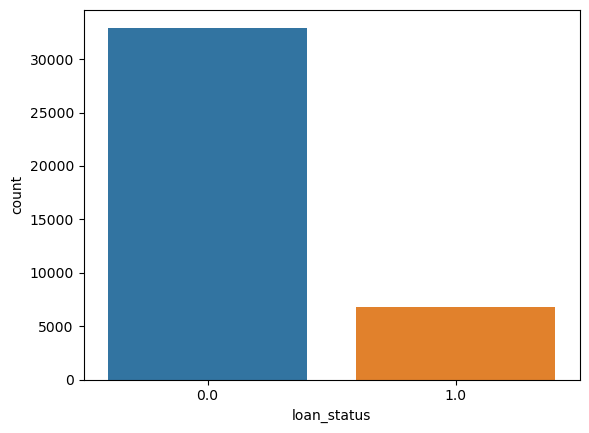

In [31]:
# Loan status 
sns.countplot(x= 'loan_status', data= loan_df)


Observing loan_status

Evidently, the percentage of individuals who have defaulted on their loans is quite low.
    

<Axes: xlabel='term', ylabel='count'>

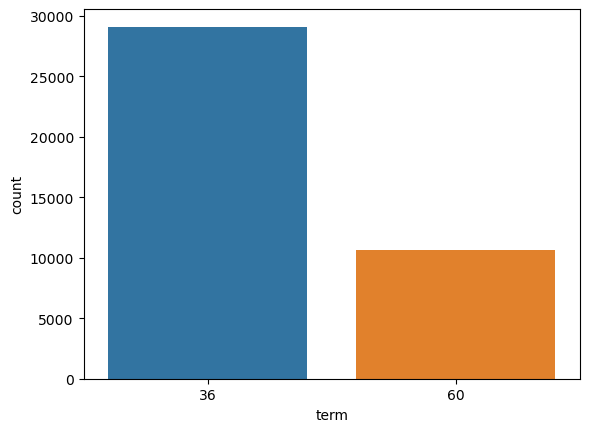

In [32]:
sns.countplot(x= 'term', data= loan_df)

Loan Duration Preference:There is a noticeable trend wherein a higher number of borrowers opt for a loan duration of 36 months compared to the 60-month term.

<Axes: xlabel='grade', ylabel='count'>

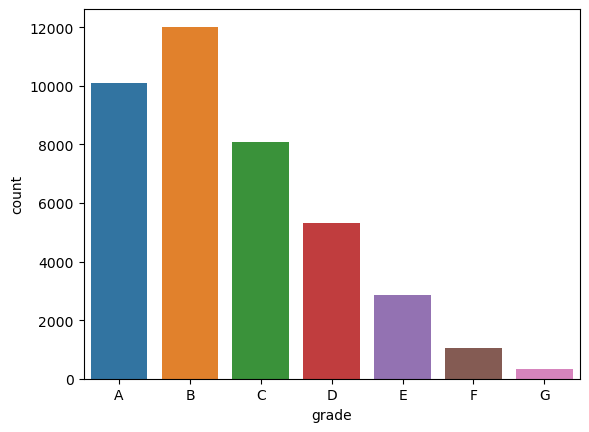

In [33]:
sns.countplot(x= 'grade', data= loan_df)

Prevalence of A and B Grade Borrowers

A substantial proportion of borrowers fall within the A and B credit grades, indicating a notable preference for loans among individuals with favorable credit ratings.

<Axes: xlabel='home_ownership', ylabel='count'>

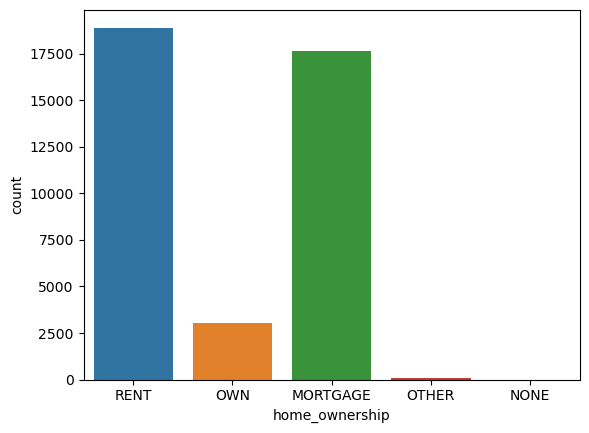

In [34]:
sns.countplot(x= 'home_ownership', data= loan_df)

Housing Status of Loan Borrowers:
The majority of individuals who have taken out loans are found to be either renting homes or having mortgage arrangements.

<Axes: xlabel='count', ylabel='purpose'>

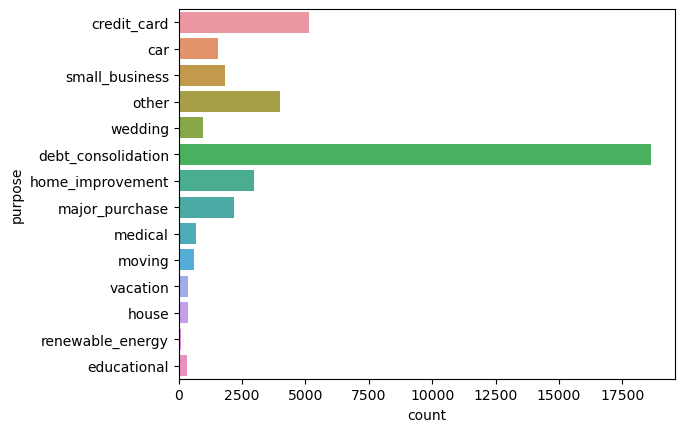

In [35]:
sns.countplot(y=loan_df.purpose)

 Loan Purpose Distribution

The data illustrates a prominent trend where a significant number of loans are sought for the purpose of debt consolidation.

### Derived Variable Analysis

In [36]:
# Lets derive some variable and analyse the same 
loan_df['issue_y']=pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.year
loan_df['issue_m']=pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.month

<Axes: xlabel='issue_m', ylabel='count'>

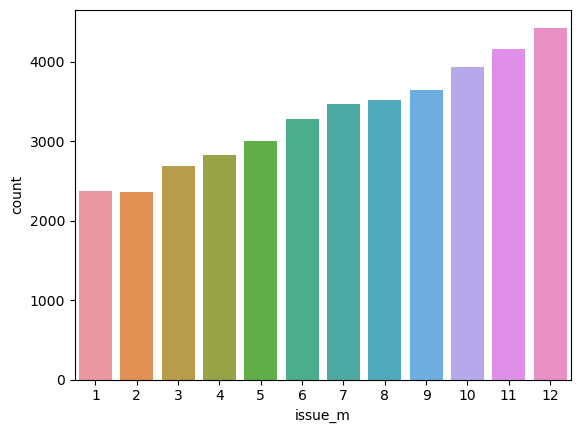

In [37]:
sns.countplot(x= 'issue_m', data= loan_df)

<Axes: xlabel='issue_y', ylabel='count'>

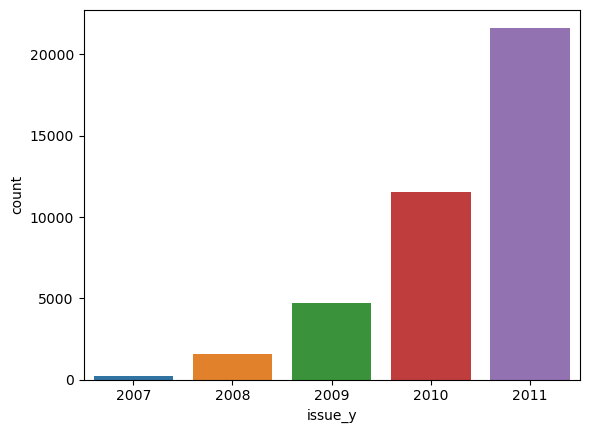

In [38]:
sns.countplot(x= 'issue_y', data= loan_df)

  Loan Approval Amount Trend Across Months

A discernible pattern emerges as the approved loan amounts steadily increase from January to December, also exhibiting an exponential growth trajectory over the years.

### Segmented Univarient Analysis

Segmented Analysis Approach: Loan Purpose

In our forthcoming analyses, we will adopt a segmentation strategy by categorizing loan applications based on their designated purposes. This variable holds the potential to influence a multitude of other factors, including applicant type, interest rates, income, and, notably, the default rate. This approach will provide us with a deeper understanding of the intricate relationships within the dataset.

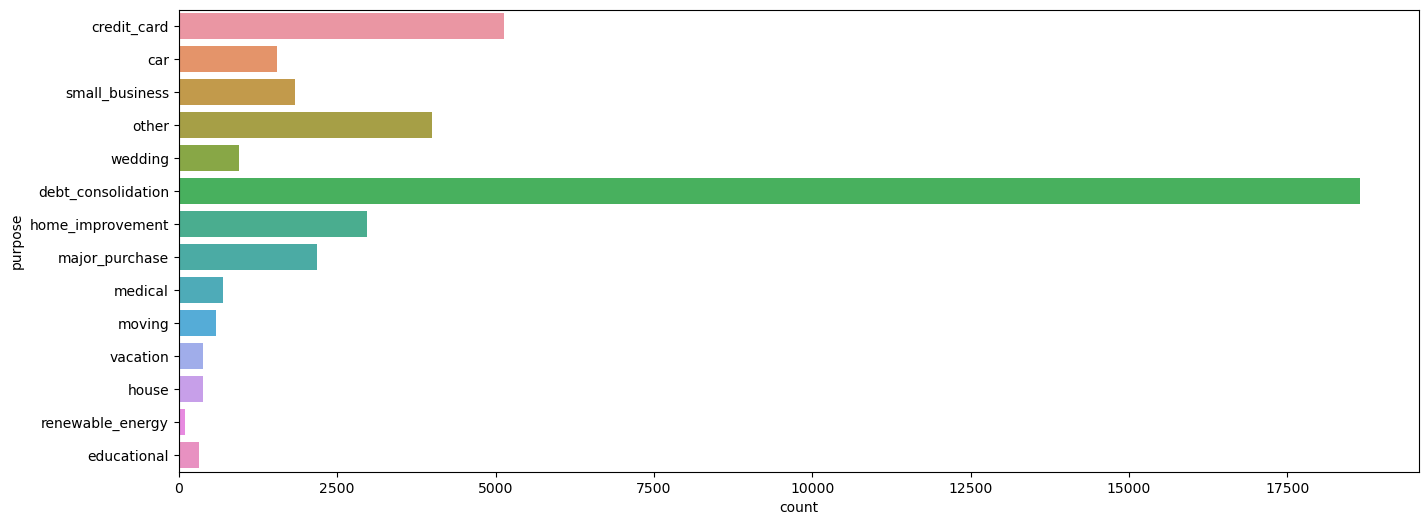

In [39]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plot.figure(figsize=(16, 6))
sns.countplot(y='purpose', data=loan_df)
plot.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [40]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
temp_df = loan_df[loan_df['purpose'].isin(main_purposes)]
temp_df['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
home_improvement       2976
major_purchase         2187
Name: purpose, dtype: int64

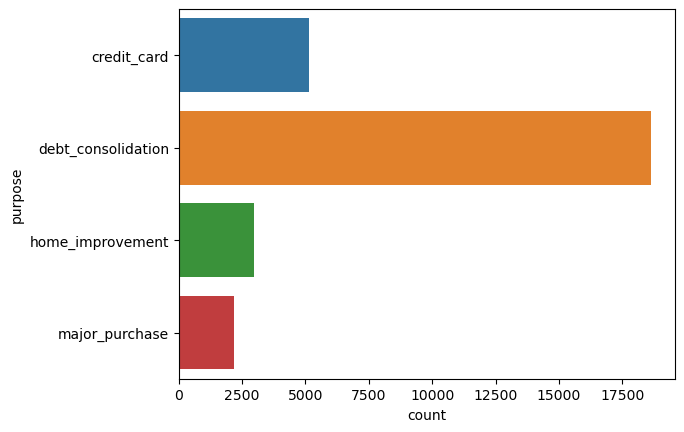

In [41]:
# plotting number of loans by purpose 
sns.countplot(y=temp_df['purpose'])
plot.show()

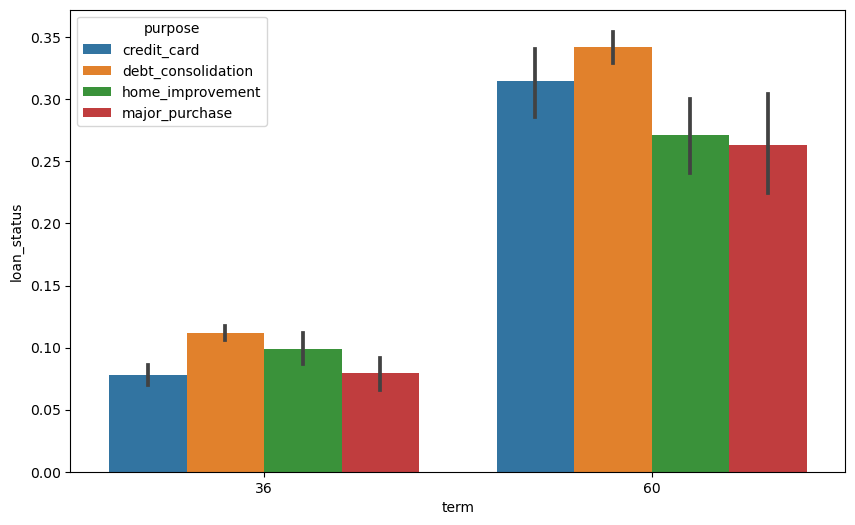

In [42]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plot.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=temp_df)
    plot.show()

    
plot_segmented('term')

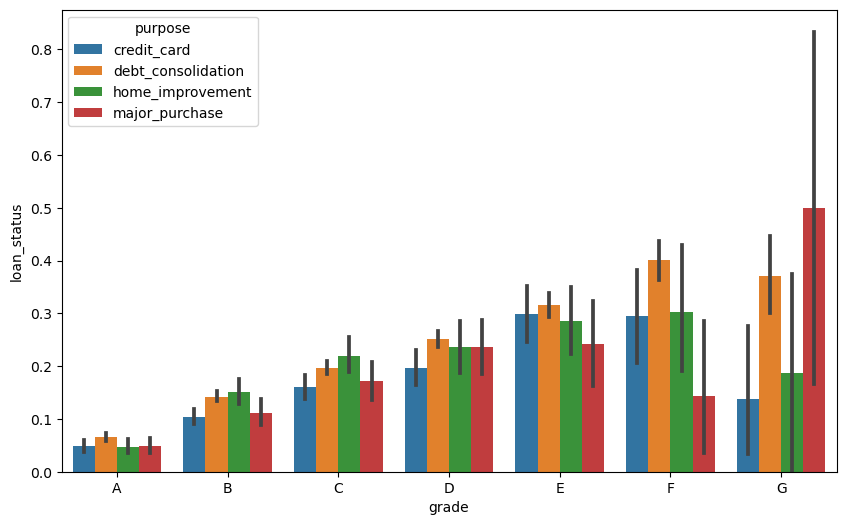

In [43]:
# grade of loan
plot_segmented('grade')

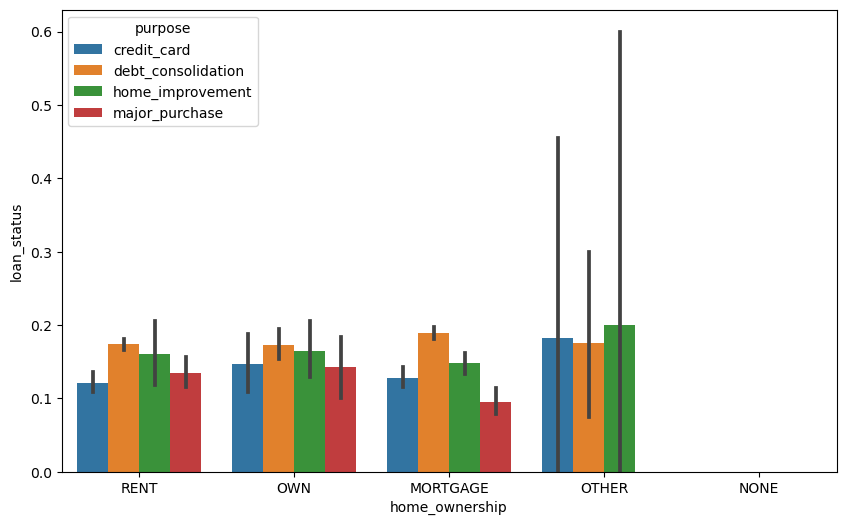

In [44]:
# home ownership
plot_segmented('home_ownership')

In general debt consolidation loans tend to exhibit the highest default rates

### Bivariate Analysis

<Axes: xlabel='term', ylabel='count'>

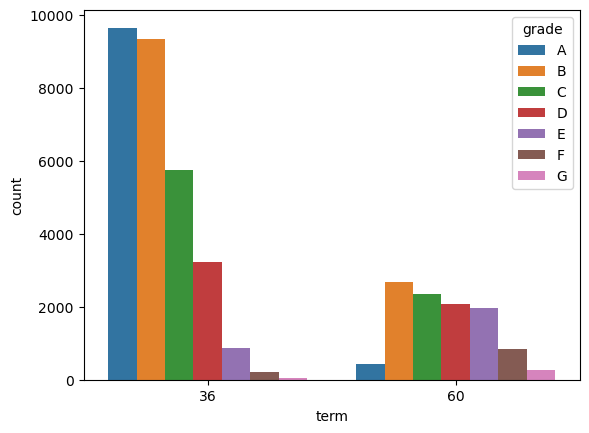

In [45]:
sns.countplot(data=loan_df,x='term',hue='grade')


Loan Duration and Credit Grade Analysis

A distinct pattern emerges when considering the relationship between loan duration and credit grades:

- Loans with a duration of 36 months are predominantly favored by individuals with credit grades A and B.
- In contrast, the 60-month loan term is more commonly selected by borrowers with credit grades B, C, and D.

<Axes: xlabel='home_ownership', ylabel='count'>

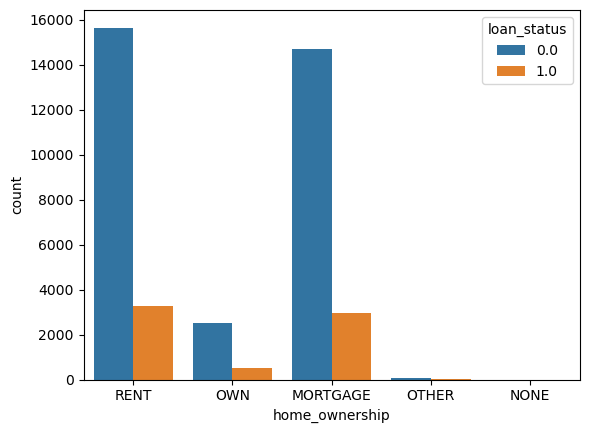

In [46]:
sns.countplot(data=loan_df,x='home_ownership',hue='loan_status')

Default Rate and Housing Status

An intriguing observation emerges regarding the default rate based on housing status:

- Individuals who are renting homes or have a mortgage exhibit a relatively higher default rate.
- Conversely, those who own their homes tend to have a lower default rate.

<Axes: xlabel='loan_status', ylabel='annual_inc'>

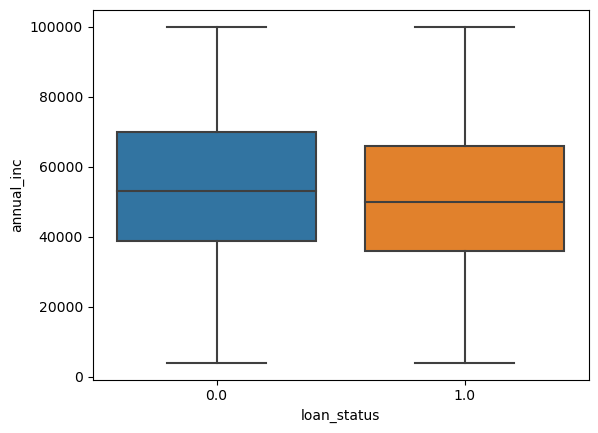

In [47]:
temp_df = loan_df[loan_df['annual_inc']<100000]
sns.boxplot(data= temp_df, x= 'loan_status', y='annual_inc')

Income and Default Probability

A clear association is evident: individuals with lower income levels have a higher likelihood of defaulting on their loans.

<Axes: xlabel='loan_status', ylabel='int_rate'>

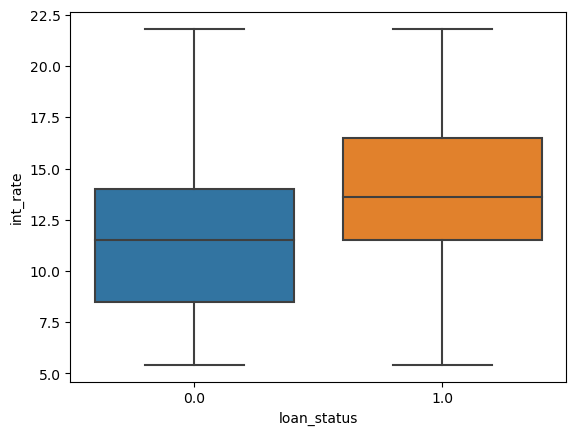

In [48]:
temp_df1 = loan_df[loan_df['int_rate']<22]
sns.boxplot(data= temp_df1, x= 'loan_status', y='int_rate')

Interest Rate and Default Relationship

A noticeable trend emerges: borrowers who are subject to higher interest rates are more prone to default on their loans.

<Axes: xlabel='loan_status', ylabel='grade'>

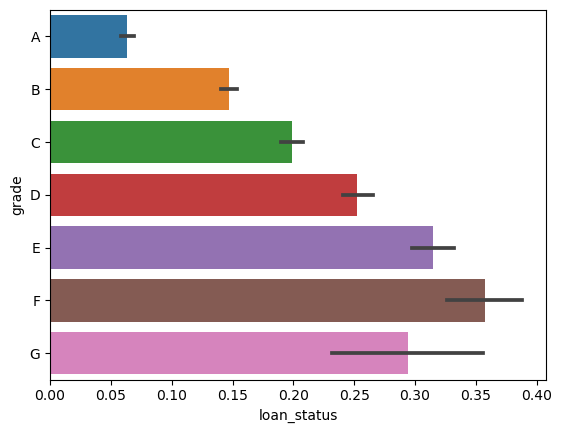

In [49]:
sns.barplot(data= temp_df1, x= 'loan_status', y='grade')

Credit Grade and Default Risk

A distinct pattern emerges: there is a significantly higher probability of default for borrowers classified under credit grades E, F, and G.

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

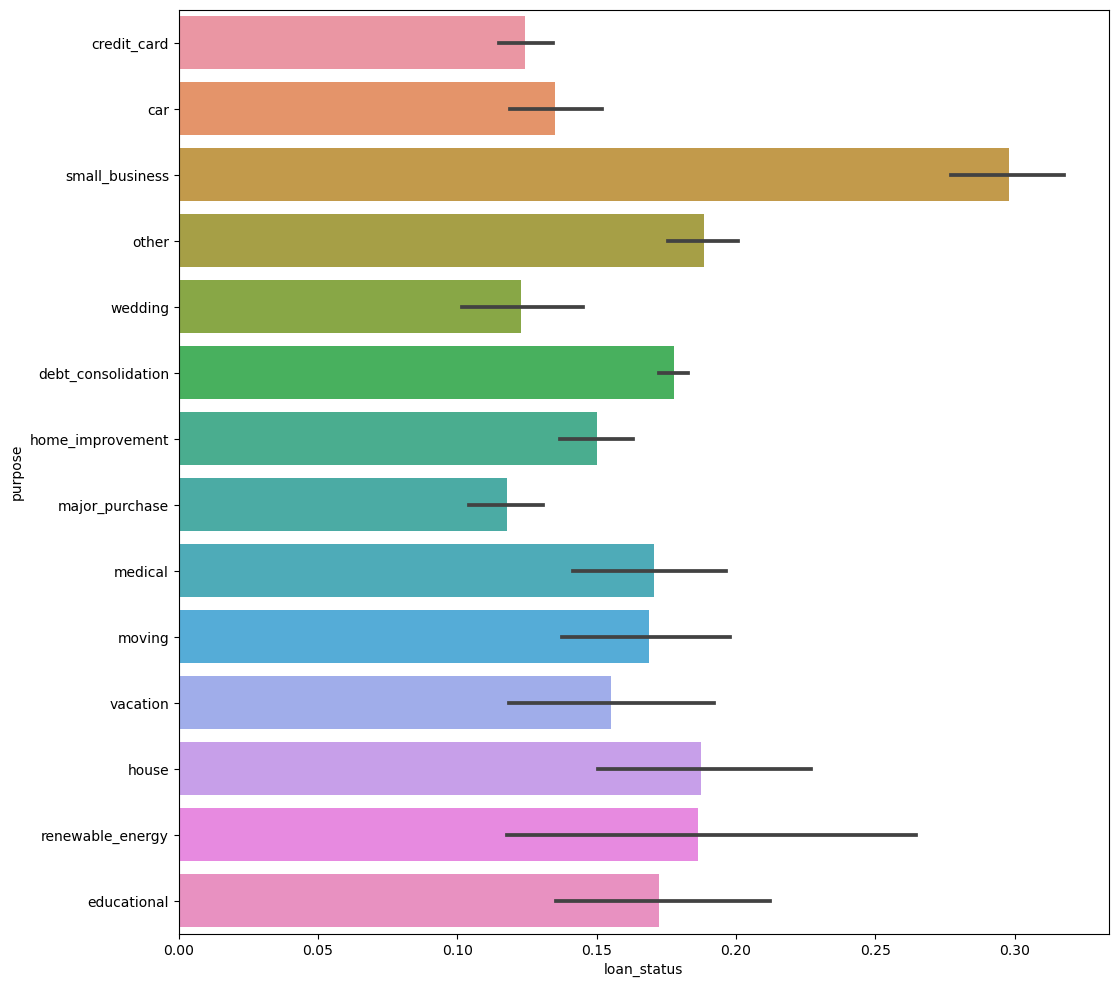

In [56]:
plot.figure(figsize=(12,12))
sns.barplot(data= temp_df1, x= 'loan_status', y='purpose')
plot.show()

<Axes: xlabel='count', ylabel='purpose'>

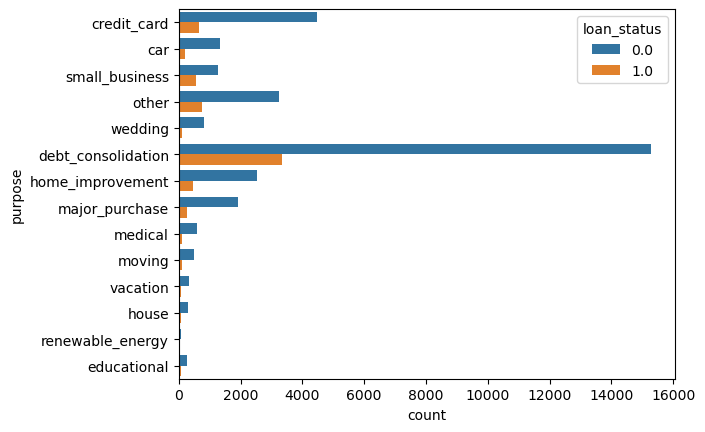

In [57]:
sns.countplot(data=loan_df,y='purpose',hue='loan_status')

Loan Purpose and Default Risk

It's evident that the highest risk for loan default is associated with the purpose of debt consolidation.

<Axes: xlabel='emp_length', ylabel='count'>

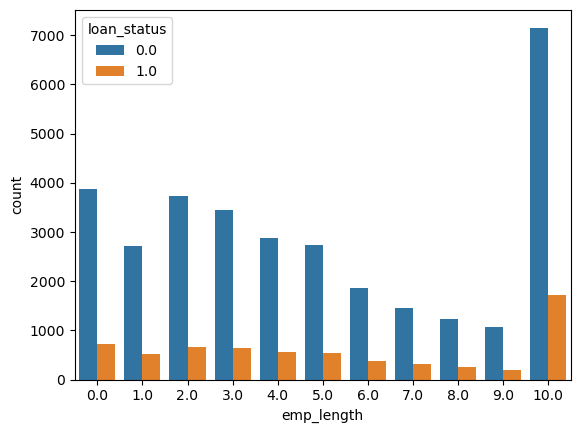

In [111]:
sns.countplot(data=loan_df,x='emp_length',hue='loan_status')

Employment length and Default Risk

Interestingly, individuals with over 10 years of experience appear to have a higher likelihood of defaulting on their loans.

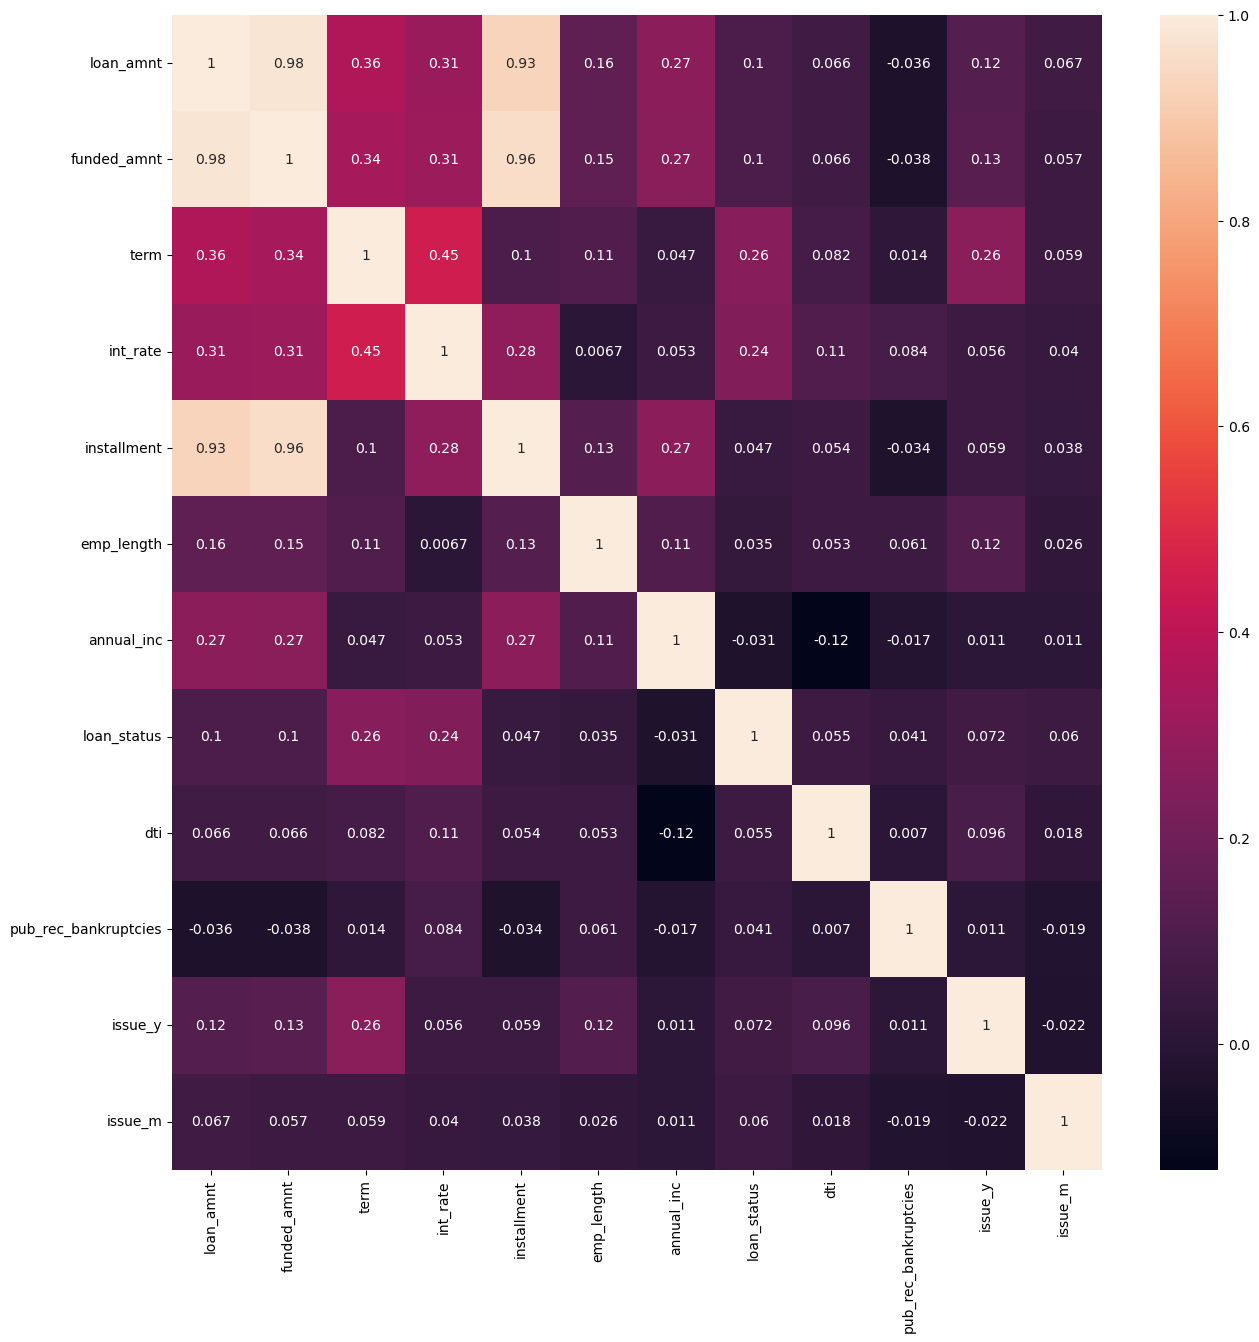

In [112]:
# Ploting correlation between variables
plot.figure(figsize=(15,15))
sns.heatmap(loan_df.corr(),annot=True)
plot.show()

The correlation matrix reveals a distinct observation: there is a notable correlation between the loan status and both the loan term and interest rate variables.